In [14]:
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


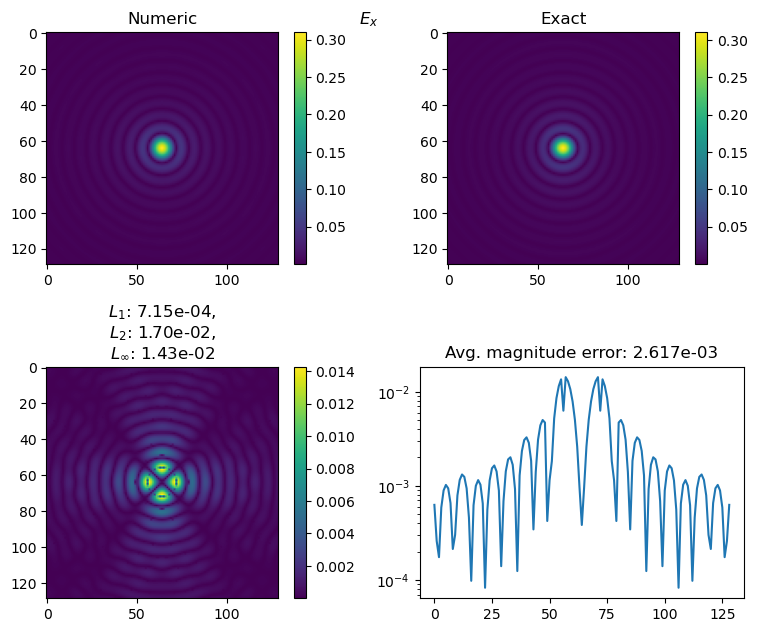

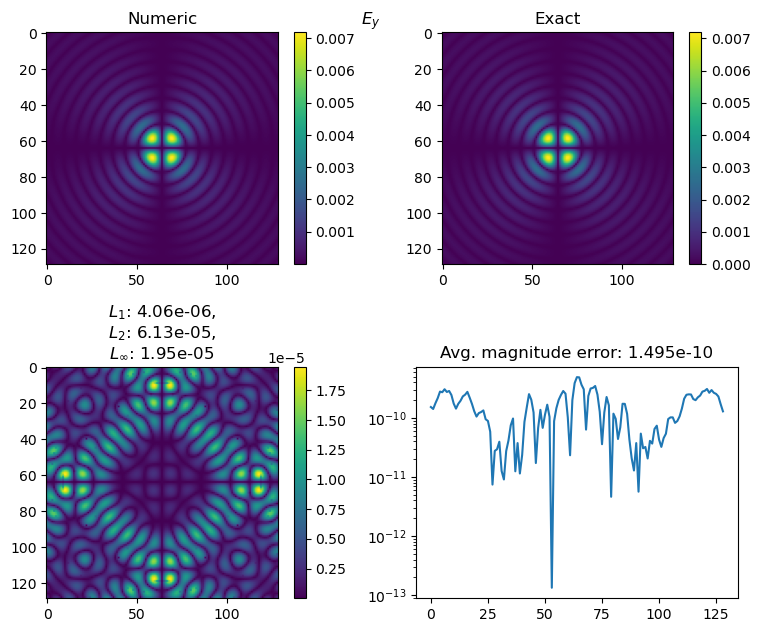

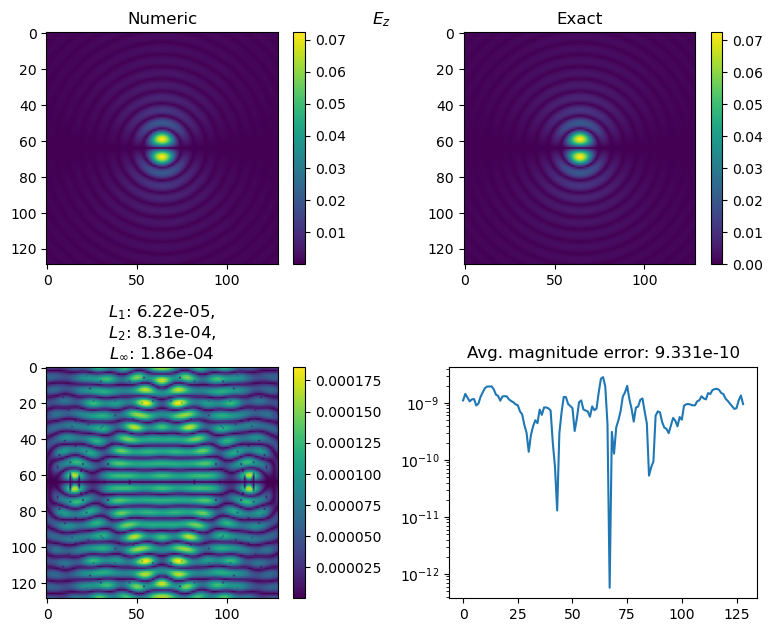

In [30]:
from src.pupil import VectorialCartesianPupil
from src.testers import VectorCartesianTester

pupil = VectorialCartesianPupil(n_pix_pupil=5)
_, E_c_ref, E_c_num = VectorCartesianTester.eval_error(32*2, pupil, True)

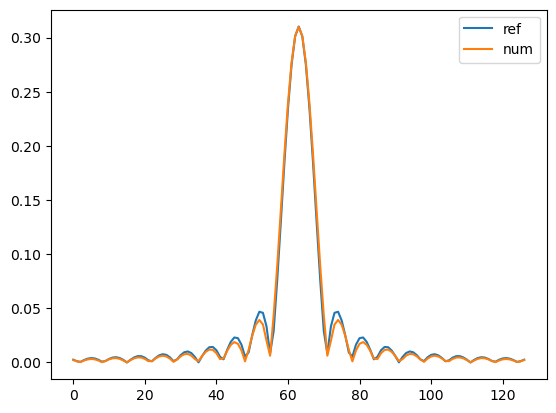

In [27]:
i = 0
idx = E_c_ref.shape[2] // 2
plt.plot(E_c_ref[i][:,idx].abs(), label="ref")
plt.plot(E_c_num[i][:,idx].abs(), label="num")
plt.legend()

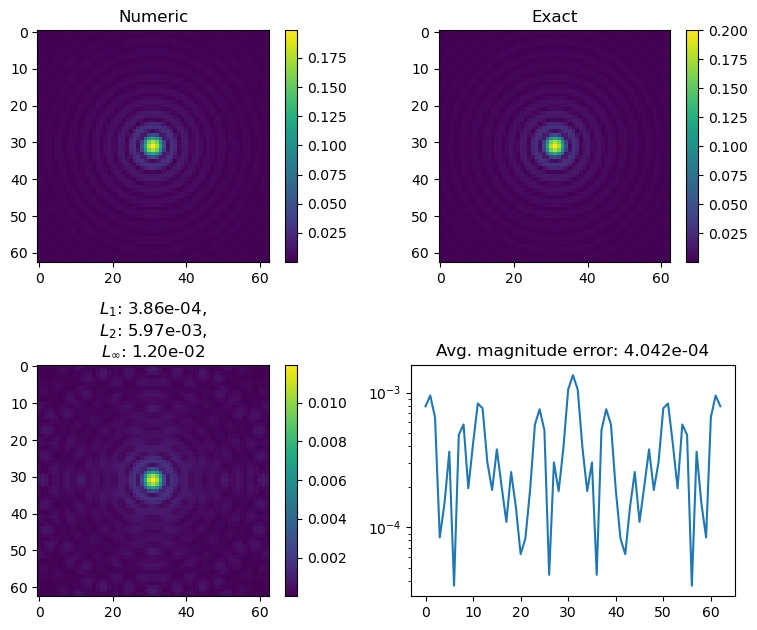

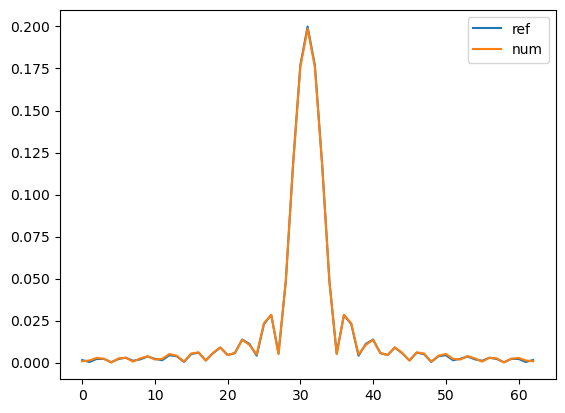

In [49]:
from src.testers import ScalarCartesianTester, ScalarPupilCase
from src.pupil import ScalarCartesianPupil

N = 16*2
pupil = ScalarCartesianPupil(n_pix_pupil=N)
tc = ScalarPupilCase(pupil.zernike_coefficients)
_,a,b = ScalarCartesianTester.eval_error(N, tc, True)

plt.figure()
idx = b.shape[-1] // 2
plt.plot(a[:,idx].abs(), label="ref")
plt.plot(b[:,idx].abs(), label="num")
plt.legend()

Text(0.5, 1.0, 'imag')

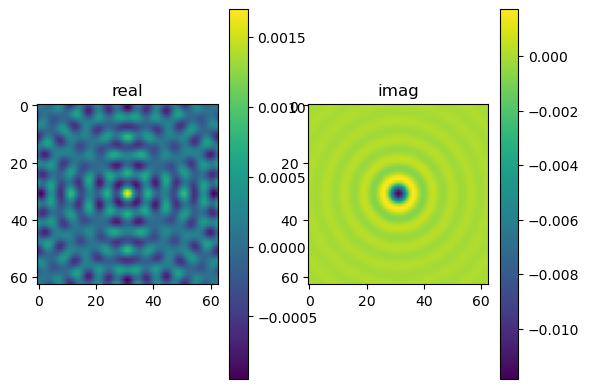

In [50]:
plt.subplot(121)
plt.imshow(torch.real(a-b))
plt.colorbar()
plt.title("real")

plt.subplot(122)
plt.imshow(torch.imag(a-b))
plt.colorbar()
plt.title("imag")